## Final Project Submission

Please fill out:
* Student name: Stephen Turk 
* Student pace: part time
* Scheduled project review date/time: 8/13/20 at 430 MST/ 630EST
* Instructor name: James Irving
* Blog post URL:


In [21]:
jupyter labextension install @jupyterlab/toc

SyntaxError: invalid syntax (<ipython-input-21-2c1e2776b58d>, line 1)

Import relevant features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')
sns.set_style('darkgrid')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Load up the data

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

After loading libraries and data, time to do some quick data exploration before cleaning

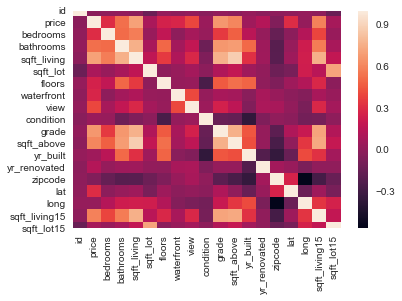

In [5]:
corr = data.corr()

sns.heatmap(corr)
plt.show()


In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Dropping columns that showed little correllation and from the column descriptions only seemed moderately useful. Date sold might be useful in terms of sesason or important to adjust for if the time period in the data was a bit longer.

In [7]:
data = data.drop([ 'id', 'view', 'date'], axis = 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


Waterfront needs some data added, but because this data seems categorical (either waterfront or not) I will assume that any missing data most likely was houses that were not on the waterfront.

In [9]:
data['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [10]:
data['waterfront'] = data['waterfront'].fillna(0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


Similarly, SqFt Basement needs to be cast as a float and I will assume a lack of data suggests no basement square-footage.

In [12]:
data['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [13]:
data.sqft_basement = data.sqft_basement.map(lambda x: float(x.replace('?', '0')))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10)
memory usage: 3.0 MB


Checking for null values

In [15]:
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Only need to check into yr_renovated

In [16]:
data['yr_renovated'].head(15)

0        0.0
1     1991.0
2        NaN
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       NaN
13       0.0
14       0.0
Name: yr_renovated, dtype: float64

In [17]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)

In [18]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
data['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [20]:
data['sqft_ratio15'] = data['sqft_living'] / data['sqft_living15']
data['sqft_lot_ratio15'] = data['sqft_lot'] / data['sqft_lot15']
data = data.drop(['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15'], axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
floors              21597 non-null float64
waterfront          21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null float64
yr_built            21597 non-null int64
yr_renovated        21597 non-null float64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_ratio15        21597 non-null float64
sqft_lot_ratio15    21597 non-null float64
dtypes: float64(10), int64(6)
memory usage: 2.6 MB


Let's normalize all non-categorical data.

In [22]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_lot_ratio15', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_ratio15']:
    data[feat] = norm_feat(data[feat])
data.describe()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_ratio15,sqft_lot_ratio15
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,5.402966e+05,-2.303005e-16,1.158082e-16,-1.473923e-16,0.006760,3.409825,7.657915,3.158406e-17,-2.895206e-17,2.674117e-15,-2.632005e-18,98077.951845,-1.768913e-14,-9.058046e-15,3.158406e-16,1.842404e-17
std,3.673681e+05,1.000000e+00,1.000000e+00,1.000000e+00,0.081944,0.650546,1.173200,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,53.513072,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-2.562024e+00,-2.101247e+00,-9.155311e-01,0.000000,1.000000,3.000000,-1.713778e+00,-6.496219e-01,-2.416991e+00,-1.888767e-01,98001.000000,-2.917271e+00,-2.167495e+00,-2.703197e+00,-8.422606e-01
25%,3.220000e+05,-4.028937e-01,-4.757266e-01,-9.155311e-01,0.000000,3.000000,7.000000,-7.231529e-01,-6.496219e-01,-6.808346e-01,-1.888767e-01,98033.000000,-6.423086e-01,-8.102234e-01,-5.368399e-01,-1.533866e-01
50%,4.500000e+05,-4.028937e-01,1.744818e-01,1.093901e-02,0.000000,3.000000,7.000000,-2.761633e-01,-6.496219e-01,1.361802e-01,-1.888767e-01,98065.000000,8.449553e-02,-1.209286e-01,-1.659137e-01,-1.042341e-01
75%,6.450000e+05,6.766715e-01,4.995859e-01,9.374092e-01,0.000000,4.000000,8.000000,5.090887e-01,6.008902e-01,8.851104e-01,-1.888767e-01,98118.000000,8.509960e-01,6.323214e-01,3.368438e-01,-3.129271e-02
max,7.700000e+06,3.198406e+01,7.651878e+00,3.716820e+00,1.000000,5.000000,13.000000,9.207265e+00,1.030941e+01,1.497871e+00,5.346267e+00,98199.000000,1.569861e+00,6.388288e+00,1.544390e+01,6.746980e+01


Looking for catagorical variables to one-hot encode:
Looks like, waterfront, condition, (likely grade), and zipcode (may be more usefull to categorize rather than just make 70 dummy variables). Though floors also has very few unique values I still think in general, that this will be a linear feature. After identifying categorical variables the next step is to one-hot encode and make sure to drop the first column from each feature to prevent multicolinearity.

Taking categorical variables and changing them to category type before one-hot encoding.

In [23]:
cat_feats = ['condition', 'grade', 'zipcode']
cat_feats_df = data[cat_feats]
cat_feats_df = cat_feats_df.astype('category')
cat_feats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
condition    21597 non-null category
grade        21597 non-null category
zipcode      21597 non-null category
dtypes: category(3)
memory usage: 67.0 KB


Now creating dummy variables and dropping the first column to ensure no dummy variable trap.

In [24]:
cat_feats_df = pd.get_dummies(cat_feats_df, drop_first=True)
cat_feats_df.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data = data.drop(['condition', 'grade', 'zipcode'], axis=1)
data= pd.concat([data, cat_feats_df], axis=1)
data.head()

,price,bedrooms,bathrooms,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,-0.402894,-1.451039,-0.915531,0.0,-0.735234,-0.649622,-0.544665,-0.188877,-0.352886,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,-0.402894,0.174482,0.937409,0.0,0.460766,0.259841,-0.680835,5.280340,1.161349,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-1.482459,-1.451039,-0.915531,0.0,-1.230546,-0.649622,-1.293596,-0.188877,1.283325,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.676671,1.149794,-0.915531,0.0,-0.892284,1.419407,-0.204243,-0.188877,-0.283598,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.402894,-0.150622,-0.915531,0.0,-0.131194,-0.649622,0.544688,-0.188877,0.409284,...,0,0,0,0,0,0,0,0,0,0


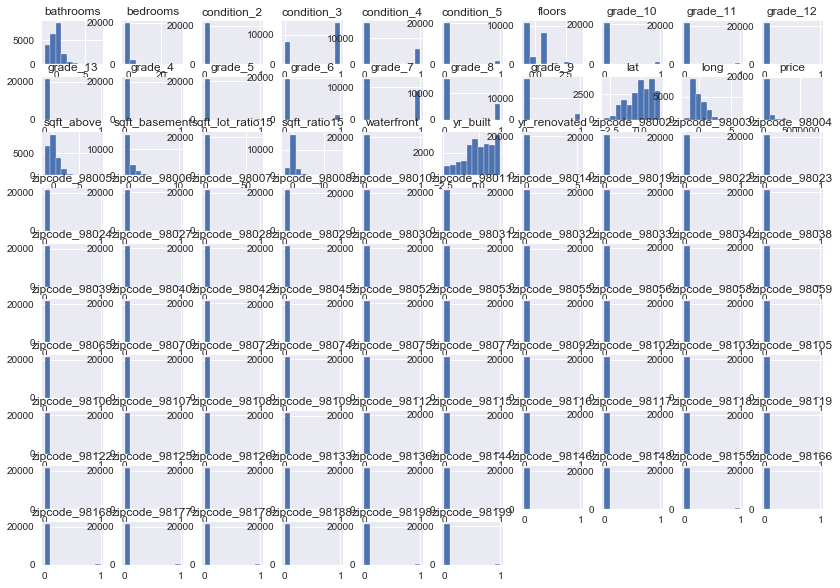

In [26]:
data.hist(figsize = (14,10))
plt.show()


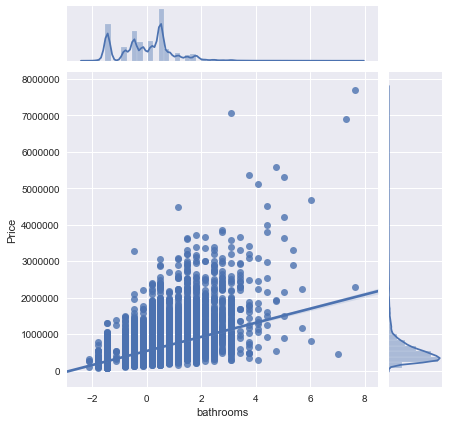

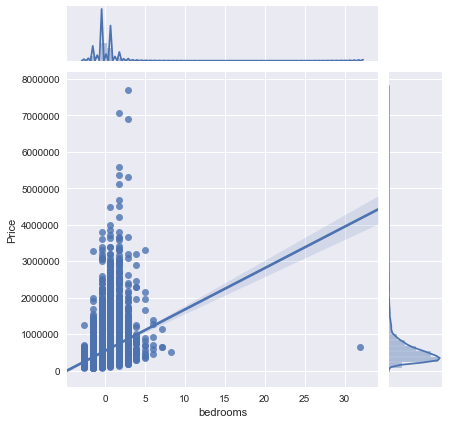

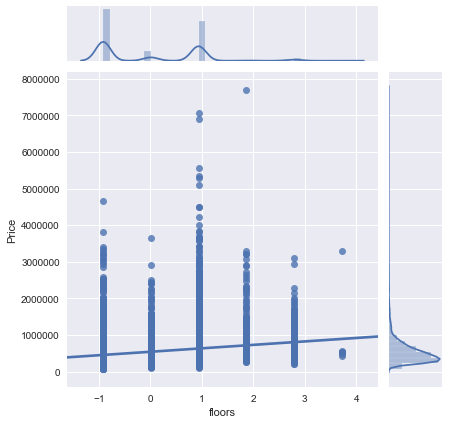

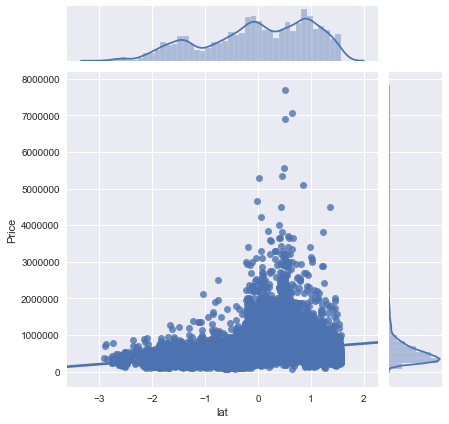

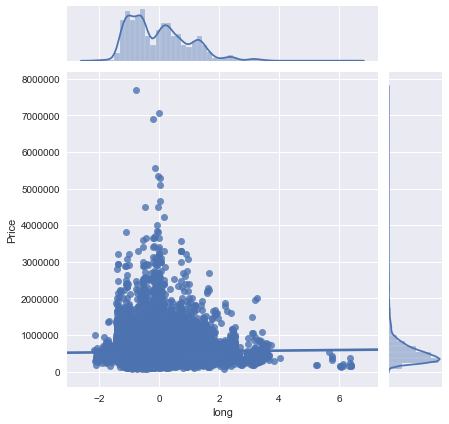

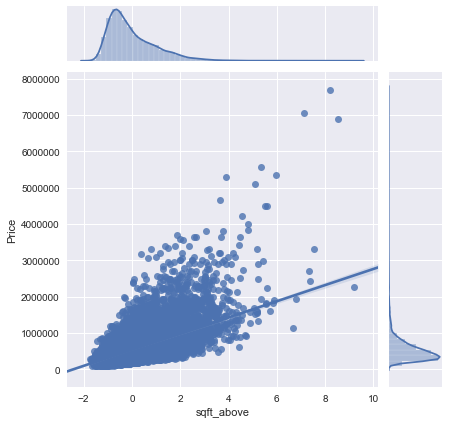

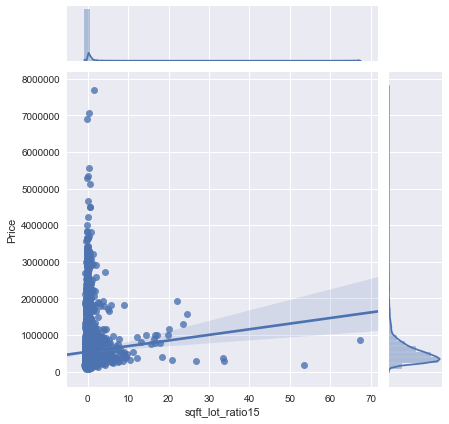

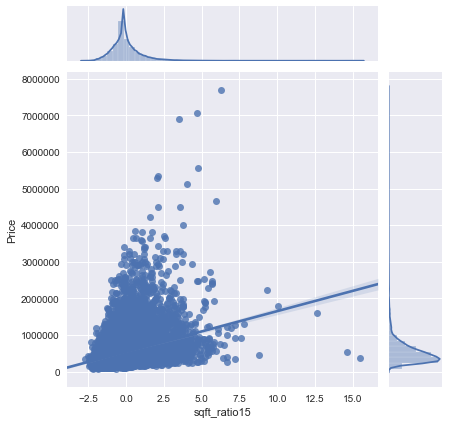

In [27]:
relcols = ['bathrooms', 'bedrooms', 'floors', 'lat', 'long', 'sqft_above', 'sqft_lot_ratio15', 'sqft_ratio15']

for col in relcols:
    sns.jointplot(x = data[col], y = data['price'], data = data, kind = 'reg')
    plt.ylabel('Price')
    plt.show()
#investigating linearity of data


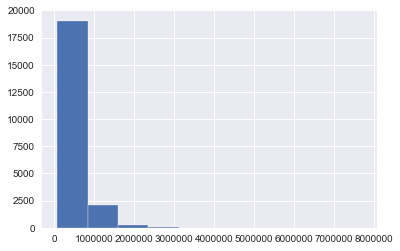

In [29]:
#checking into target variable

data['price'].hist()
plt.show()

In [30]:
data.price = data.price.map(np.log) #log transform price...

Now ready to remove the outcome (price) and train the model by splitting out train/test data points.

In [31]:
outcome = 'price'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [32]:
train, test = train_test_split(data)

In [33]:
print(len(train), len(test))
train.head()

16197 5400


,price,bedrooms,bathrooms,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
21068,13.429848,0.676671,1.800003,0.937409,0.0,0.243311,0.532680,1.429787,-0.188877,1.011225,...,0,0,0,0,0,0,0,0,0,0
7402,12.736701,0.676671,0.499586,0.937409,0.0,0.788155,-0.649622,1.225533,-0.188877,-1.706171,...,0,0,0,0,0,0,0,0,0,0
11342,12.388394,-0.402894,-0.800831,-0.915531,0.0,-0.396971,-0.649622,0.204265,-0.188877,-1.791338,...,0,0,0,0,0,0,0,0,0,0
18252,14.122995,1.756237,2.125107,0.937409,0.0,2.381613,2.078768,1.021279,-0.188877,-0.079342,...,0,0,0,0,0,0,0,0,0,0
7333,13.244581,0.676671,-1.451039,-0.915531,0.0,0.460766,-0.649622,-0.340412,-0.188877,0.932554,...,0,0,0,0,0,0,0,0,0,0


In [34]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1108.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:18:42   Log-Likelihood:                 3853.0
No. Observations:               16197   AIC:                            -7514.
Df Residuals:                   16101   BIC:                            -6776.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.4274      0.198     62.910      0.000      12.040      12.815
bedrooms            -0.0051      0.002     -2.433      0.015      -0.009      -0.001
bathrooms            0.0373      0.003     13.301      0.000       0.032       0.043
floors              -0.0199      0.002     -8.422      0.000      -0.025      -0.015
waterfront           0.6405      0.019     33.806      0.000       0.603       0.678
sqft_above           0.2329      0.004     63.642      0.000       0.226       0.240
sqft_basement        0.0935      0.002     41.176      0.000       0.089       0.098
yr_built            -0.0313      0.003    -11.798      0.000      -0.036      -0.026
yr_renovated         0.0137      0.002      8.555      0.000       0.011       0.017
lat                  0.0654      0.012      5.406      0.000       0.042       0.089
long                -0.0423      0.009     -4.842      0.000      -0.059      -0.025
sqft_ratio15        -0.0385      0.002    -18.091      0.000      -0.043      -0.034
sqft_lot_ratio15     0.0162      0.002      9.234      0.000       0.013       0.020
condition_2          0.1401      0.042      3.316      0.001       0.057       0.223
condition_3          0.2611      0.039      6.735      0.000       0.185       0.337
condition_4          0.3066      0.039      7.904      0.000       0.231       0.383
condition_5          0.3676      0.039      9.412      0.000       0.291       0.444
grade_4             -0.2955      0.197     -1.500      0.134      -0.681       0.091
grade_5             -0.3248      0.192     -1.688      0.091      -0.702       0.052
grade_6             -0.2221      0.192     -1.157      0.247      -0.598       0.154
grade_7             -0.0879      0.192     -0.458      0.647      -0.464       0.288
grade_8              0.0325      0.192      0.169      0.866      -0.344       0.409
grade_9              0.1541      0.192      0.802      0.423      -0.223       0.531
grade_10             0.2192      0.192      1.140      0.255      -0.158       0.596
grade_11             0.2417      0.193      1.255      0.210      -0.136       0.619
grade_12             0.2591      0.194      1.336      0.181      -0.121       0.639
grade_13             0.2443      0.204      1.200      0.230      -0.155       0.643
zipcode_98002       -0.0177      0.020     -0.892      0.372      -0.056       0.021
zipcode_98003       -0.0052      0.018     -0.290      0.772      -0.041       0.030
zipcode_98004        0.9530      0.033     29.277      0.000       0.889       1.017
zipcode_98005        0.5944      0.035     17.023      0.000       0.526       0.663
zipcode_98006        0.5417      0.028     19.115      0.000       0.486       0.597
zipcode_98007        0.5165      0.036     14.299      0.000       0.446       0.587
zipcode_98008        0.

Our R2 score is not too bad, but we have lots of columns and many have far too high of a P score.

In [35]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

96 78
['bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,12.4274,0.198,62.910,0.000,12.040,12.815
bedrooms,-0.0051,0.002,-2.433,0.015,-0.009,-0.001
bathrooms,0.0373,0.003,13.301,0.000,0.032,0.043
floors,-0.0199,0.002,-8.422,0.000,-0.025,-0.015
waterfront,0.6405,0.019,33.806,0.000,0.603,0.678


In [36]:
x_cols

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_ratio15',
 'sqft_lot_ratio15',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode

In [37]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1164.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:19:26   Log-Likelihood:                 2819.3
No. Observations:               16197   AIC:                            -5481.
Df Residuals:                   16118   BIC:                            -4873.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.3005      0.043    285.615      0.000      12.216      12.385
bedrooms            -0.0104      0.002     -4.797      0.000      -0.015      -0.006
bathrooms            0.0471      0.003     15.869      0.000       0.041       0.053
floors              -0.0170      0.002     -6.825      0.000      -0.022      -0.012
waterfront           0.6550      0.020     32.631      0.000       0.616       0.694
sqft_above           0.3143      0.003    107.758      0.000       0.309       0.320
sqft_basement        0.1217      0.002     53.411      0.000       0.117       0.126
yr_built             0.0054      0.003      2.005      0.045       0.000       0.011
yr_renovated         0.0184      0.002     10.849      0.000       0.015       0.022
lat                  0.0673      0.009      7.665      0.000       0.050       0.084
long                -0.0527      0.008     -6.381      0.000      -0.069      -0.037
sqft_ratio15        -0.0567      0.002    -25.968      0.000      -0.061      -0.052
sqft_lot_ratio15     0.0169      0.002      9.006      0.000       0.013       0.021
condition_2          0.1911      0.045      4.260      0.000       0.103       0.279
condition_3          0.3434      0.041      8.366      0.000       0.263       0.424
condition_4          0.3915      0.041      9.536      0.000       0.311       0.472
condition_5          0.4518      0.041     10.927      0.000       0.371       0.533
zipcode_98004        1.0023      0.022     45.006      0.000       0.959       1.046
zipcode_98005        0.6576      0.026     25.032      0.000       0.606       0.709
zipcode_98006        0.6052      0.019     31.306      0.000       0.567       0.643
zipcode_98007        0.5775      0.028     20.645      0.000       0.523       0.632
zipcode_98008        0.5801      0.025     23.670      0.000       0.532       0.628
zipcode_98010        0.3199      0.029     11.051      0.000       0.263       0.377
zipcode_98011        0.2481      0.031      7.999      0.000       0.187       0.309
zipcode_98014        0.3139      0.040      7.859      0.000       0.236       0.392
zipcode_98019        0.2123      0.037      5.769      0.000       0.140       0.284
zipcode_98022        0.2555      0.024     10.659      0.000       0.209       0.302
zipcode_98023       -0.0600      0.014     -4.361      0.000      -0.087      -0.033
zipcode_98024        0.4609      0.037     12.548      0.000       0.389       0.533
zipcode_98027        0.5086      0.022     23.094      0.000       0.465       0.552
zipcode_98028        0.2107      0.029      7.293      0.000       0.154       0.267
zipcode_98029        0.5916      0.026     22.930      0.000       0.541       0.642
zipcode_98031        0.0451      0.016      2.785      0.005       0.013       0.077
zipcode_98032       -0.

In [38]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table

79 78
['bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,12.3005,0.043,285.615,0.000,12.216,12.385
bedrooms,-0.0104,0.002,-4.797,0.000,-0.015,-0.006
bathrooms,0.0471,0.003,15.869,0.000,0.041,0.053
floors,-0.0170,0.002,-6.825,0.000,-0.022,-0.012
waterfront,0.6550,0.020,32.631,0.000,0.616,0.694
...,...,...,...,...,...,...
zipcode_98155,0.2016,0.027,7.470,0.000,0.149,0.255
zipcode_98166,0.2347,0.017,14.006,0.000,0.202,0.268
zipcode_98177,0.4091,0.028,14.607,0.000,0.354,0.464


In [39]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1164.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:19:40   Log-Likelihood:                 2819.3
No. Observations:               16197   AIC:                            -5481.
Df Residuals:                   16118   BIC:                            -4873.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.3005      0.043    285.615      0.000      12.216      12.385
bedrooms            -0.0104      0.002     -4.797      0.000      -0.015      -0.006
bathrooms            0.0471      0.003     15.869      0.000       0.041       0.053
floors              -0.0170      0.002     -6.825      0.000      -0.022      -0.012
waterfront           0.6550      0.020     32.631      0.000       0.616       0.694
sqft_above           0.3143      0.003    107.758      0.000       0.309       0.320
sqft_basement        0.1217      0.002     53.411      0.000       0.117       0.126
yr_built             0.0054      0.003      2.005      0.045       0.000       0.011
yr_renovated         0.0184      0.002     10.849      0.000       0.015       0.022
lat                  0.0673      0.009      7.665      0.000       0.050       0.084
long                -0.0527      0.008     -6.381      0.000      -0.069      -0.037
sqft_ratio15        -0.0567      0.002    -25.968      0.000      -0.061      -0.052
sqft_lot_ratio15     0.0169      0.002      9.006      0.000       0.013       0.021
condition_2          0.1911      0.045      4.260      0.000       0.103       0.279
condition_3          0.3434      0.041      8.366      0.000       0.263       0.424
condition_4          0.3915      0.041      9.536      0.000       0.311       0.472
condition_5          0.4518      0.041     10.927      0.000       0.371       0.533
zipcode_98004        1.0023      0.022     45.006      0.000       0.959       1.046
zipcode_98005        0.6576      0.026     25.032      0.000       0.606       0.709
zipcode_98006        0.6052      0.019     31.306      0.000       0.567       0.643
zipcode_98007        0.5775      0.028     20.645      0.000       0.523       0.632
zipcode_98008        0.5801      0.025     23.670      0.000       0.532       0.628
zipcode_98010        0.3199      0.029     11.051      0.000       0.263       0.377
zipcode_98011        0.2481      0.031      7.999      0.000       0.187       0.309
zipcode_98014        0.3139      0.040      7.859      0.000       0.236       0.392
zipcode_98019        0.2123      0.037      5.769      0.000       0.140       0.284
zipcode_98022        0.2555      0.024     10.659      0.000       0.209       0.302
zipcode_98023       -0.0600      0.014     -4.361      0.000      -0.087      -0.033
zipcode_98024        0.4609      0.037     12.548      0.000       0.389       0.533
zipcode_98027        0.5086      0.022     23.094      0.000       0.465       0.552
zipcode_98028        0.2107      0.029      7.293      0.000       0.154       0.267
zipcode_98029        0.5916      0.026     22.930      0.000       0.541       0.642
zipcode_98031        0.0451      0.016      2.785      0.005       0.013       0.077
zipcode_98032       -0.

After 2 rounds of removing non-influential columns lets got on to check for multicollinearity.

In [40]:
X = data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.6733680395146528),
 ('bathrooms', 3.3767603533849826),
 ('floors', 2.4084517689117413),
 ('waterfront', 1.0757422782359753),
 ('sqft_above', 3.2985436484024913),
 ('sqft_basement', 1.9876109296405513),
 ('yr_built', 2.768813755418873),
 ('yr_renovated', 1.1402737273109007),
 ('lat', 27.972138179730138),
 ('long', 26.368776619248674),
 ('sqft_ratio15', 1.80323277333488),
 ('sqft_lot_ratio15', 1.0336577626043433),
 ('condition_2', 1.5548684711722178),
 ('condition_3', 46.32027089516059),
 ('condition_4', 20.147784311248564),
 ('condition_5', 6.8014964519969645),
 ('zipcode_98004', 2.655920760252284),
 ('zipcode_98005', 1.9485642275108588),
 ('zipcode_98006', 3.1891503943255253),
 ('zipcode_98007', 1.8490831220169963),
 ('zipcode_98008', 2.8912358352203125),
 ('zipcode_98010', 1.5081265534146922),
 ('zipcode_98011', 3.1743691716521587),
 ('zipcode_98014', 3.464270148137143),
 ('zipcode_98019', 4.378022168410081),
 ('zipcode_98022', 2.4616091159405635),
 ('zipcode_98023', 1

In our case removing vif higher than 5.0 does not remove too much data.

In [41]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

78 62


In [42]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     776.4
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:20:24   Log-Likelihood:                -1310.4
No. Observations:               16197   AIC:                             2747.
Df Residuals:                   16134   BIC:                             3231.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.0314      0.004   3551.003      0.000      13.024      13.039
bedrooms            -0.0284      0.003    -10.249      0.000      -0.034      -0.023
bathrooms            0.0679      0.004     17.874      0.000       0.060       0.075
floors               0.0297      0.003      9.799      0.000       0.024       0.036
waterfront           0.5943      0.026     23.004      0.000       0.544       0.645
sqft_above           0.3009      0.004     83.587      0.000       0.294       0.308
sqft_basement        0.1432      0.003     48.992      0.000       0.137       0.149
yr_built            -0.0609      0.003    -20.165      0.000      -0.067      -0.055
yr_renovated         0.0075      0.002      3.470      0.001       0.003       0.012
sqft_ratio15        -0.0573      0.003    -20.759      0.000      -0.063      -0.052
sqft_lot_ratio15     0.0106      0.002      4.385      0.000       0.006       0.015
condition_2         -0.2100      0.024     -8.731      0.000      -0.257      -0.163
zipcode_98004        0.6719      0.018     37.690      0.000       0.637       0.707
zipcode_98005        0.3239      0.025     13.207      0.000       0.276       0.372
zipcode_98006        0.2341      0.014     16.522      0.000       0.206       0.262
zipcode_98007        0.2353      0.027      8.804      0.000       0.183       0.288
zipcode_98008        0.2354      0.019     12.673      0.000       0.199       0.272
zipcode_98010       -0.1943      0.031     -6.343      0.000      -0.254      -0.134
zipcode_98011       -0.0132      0.022     -0.598      0.550      -0.057       0.030
zipcode_98014       -0.1151      0.027     -4.303      0.000      -0.168      -0.063
zipcode_98019       -0.1482      0.022     -6.697      0.000      -0.192      -0.105
zipcode_98022       -0.3177      0.020    -15.903      0.000      -0.357      -0.279
zipcode_98023       -0.4615      0.014    -33.156      0.000      -0.489      -0.434
zipcode_98024       -0.0057      0.033     -0.176      0.860      -0.070       0.058
zipcode_98027        0.0739      0.016      4.749      0.000       0.043       0.104
zipcode_98028       -0.0351      0.018     -1.916      0.055      -0.071       0.001
zipcode_98029        0.1555      0.018      8.783      0.000       0.121       0.190
zipcode_98031       -0.3716      0.019    -20.026      0.000      -0.408      -0.335
zipcode_98032       -0.4638      0.028    -16.392      0.000      -0.519      -0.408
zipcode_98033        0.3431      0.015     23.101      0.000       0.314       0.372
zipcode_98038       -0.2933      0.013    -22.061      0.000      -0.319      -0.267
zipcode_98039        0.7189      0.046     15.737      0.000       0.629       0.808
zipcode_98040        0.4473      0.018     24.247      0.000       0.411       0.483
zipcode_98042       -0.

We lost a few columns due to multicollinearity, but our R2 score remains fairly high at .75. Looking at our model again, it does seem like some additional columns are showing too high of a p score. Let's run another round checking for that .05 cutoff.

In [43]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table

63 57
['bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,13.0314,0.004,3551.003,0.0,13.024,13.039
bedrooms,-0.0284,0.003,-10.249,0.0,-0.034,-0.023
bathrooms,0.0679,0.004,17.874,0.0,0.060,0.075
floors,0.0297,0.003,9.799,0.0,0.024,0.036
waterfront,0.5943,0.026,23.004,0.0,0.544,0.645
...,...,...,...,...,...,...
zipcode_98146,-0.1996,0.019,-10.769,0.0,-0.236,-0.163
zipcode_98166,-0.1238,0.019,-6.498,0.0,-0.161,-0.086
zipcode_98177,0.1828,0.019,9.509,0.0,0.145,0.220


In [44]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     844.2
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:20:57   Log-Likelihood:                -1314.9
No. Observations:               16197   AIC:                             2746.
Df Residuals:                   16139   BIC:                             3192.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.0299      0.003   3771.301      0.000      13.023      13.037
bedrooms            -0.0285      0.003    -10.282      0.000      -0.034      -0.023
bathrooms            0.0679      0.004     17.863      0.000       0.060       0.075
floors               0.0298      0.003      9.854      0.000       0.024       0.036
waterfront           0.5868      0.025     23.044      0.000       0.537       0.637
sqft_above           0.3015      0.004     84.587      0.000       0.295       0.309
sqft_basement        0.1433      0.003     49.087      0.000       0.138       0.149
yr_built            -0.0611      0.003    -20.283      0.000      -0.067      -0.055
yr_renovated         0.0074      0.002      3.442      0.001       0.003       0.012
sqft_ratio15        -0.0575      0.003    -20.926      0.000      -0.063      -0.052
sqft_lot_ratio15     0.0104      0.002      4.330      0.000       0.006       0.015
condition_2         -0.2109      0.024     -8.775      0.000      -0.258      -0.164
zipcode_98004        0.6730      0.018     37.887      0.000       0.638       0.708
zipcode_98005        0.3251      0.024     13.279      0.000       0.277       0.373
zipcode_98006        0.2352      0.014     16.702      0.000       0.208       0.263
zipcode_98007        0.2367      0.027      8.867      0.000       0.184       0.289
zipcode_98008        0.2371      0.019     12.796      0.000       0.201       0.273
zipcode_98010       -0.1928      0.031     -6.301      0.000      -0.253      -0.133
zipcode_98014       -0.1136      0.027     -4.253      0.000      -0.166      -0.061
zipcode_98019       -0.1468      0.022     -6.643      0.000      -0.190      -0.103
zipcode_98022       -0.3161      0.020    -15.855      0.000      -0.355      -0.277
zipcode_98023       -0.4599      0.014    -33.185      0.000      -0.487      -0.433
zipcode_98027        0.0752      0.015      4.855      0.000       0.045       0.106
zipcode_98029        0.1568      0.018      8.885      0.000       0.122       0.191
zipcode_98031       -0.3700      0.019    -19.982      0.000      -0.406      -0.334
zipcode_98032       -0.4621      0.028    -16.346      0.000      -0.518      -0.407
zipcode_98033        0.3445      0.015     23.293      0.000       0.316       0.374
zipcode_98038       -0.2918      0.013    -22.067      0.000      -0.318      -0.266
zipcode_98039        0.7195      0.046     15.762      0.000       0.630       0.809
zipcode_98040        0.4485      0.018     24.399      0.000       0.412       0.485
zipcode_98042       -0.3738      0.013    -27.734      0.000      -0.400      -0.347
zipcode_98055       -0.3422      0.019    -18.173      0.000      -0.379      -0.305
zipcode_98056       -0.1301      0.016     -8.371      0.000      -0.161      -0.100
zipcode_98058       -0.

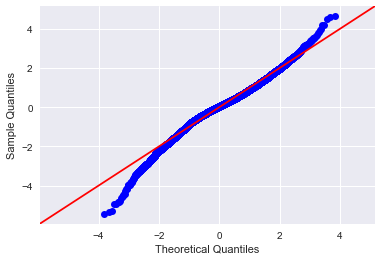

In [45]:
model_resid = model.resid

fig = sm.graphics.qqplot(model_resid, dist=stats.norm, line='45', fit=True)


The log tranform really helps with normality.

Checking for homoscedasticity

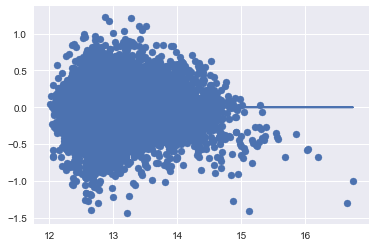

In [46]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [47]:
len(x_cols)

71

In [47]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     276.9
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:23:07   Log-Likelihood:                -574.11
No. Observations:                5400   AIC:                             1264.
Df Residuals:                    5342   BIC:                             1647.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.0242      0.006   2135.524      0.000      13.012      13.036
bedrooms            -0.0137      0.004     -3.239      0.001      -0.022      -0.005
bathrooms            0.0524      0.007      7.937      0.000       0.039       0.065
floors               0.0319      0.005      5.932      0.000       0.021       0.042
waterfront           0.6051      0.048     12.718      0.000       0.512       0.698
sqft_above           0.2938      0.006     46.782      0.000       0.282       0.306
sqft_basement        0.1387      0.005     27.501      0.000       0.129       0.149
yr_built            -0.0583      0.005    -10.930      0.000      -0.069      -0.048
yr_renovated         0.0061      0.004      1.542      0.123      -0.002       0.014
sqft_ratio15        -0.0429      0.005     -9.171      0.000      -0.052      -0.034
sqft_lot_ratio15     0.0051      0.003      1.788      0.074      -0.000       0.011
condition_2         -0.2814      0.040     -7.003      0.000      -0.360      -0.203
zipcode_98004        0.6770      0.031     21.961      0.000       0.617       0.737
zipcode_98005        0.3455      0.039      8.761      0.000       0.268       0.423
zipcode_98006        0.2648      0.027      9.699      0.000       0.211       0.318
zipcode_98007        0.2126      0.042      5.030      0.000       0.130       0.295
zipcode_98008        0.2332      0.033      7.142      0.000       0.169       0.297
zipcode_98010       -0.1438      0.055     -2.635      0.008      -0.251      -0.037
zipcode_98014       -0.1511      0.055     -2.752      0.006      -0.259      -0.043
zipcode_98019       -0.1257      0.041     -3.040      0.002      -0.207      -0.045
zipcode_98022       -0.3758      0.038     -9.947      0.000      -0.450      -0.302
zipcode_98023       -0.4476      0.026    -16.955      0.000      -0.499      -0.396
zipcode_98027        0.0533      0.027      1.953      0.051      -0.000       0.107
zipcode_98029        0.1648      0.030      5.471      0.000       0.106       0.224
zipcode_98031       -0.3719      0.035    -10.704      0.000      -0.440      -0.304
zipcode_98032       -0.4917      0.045    -10.925      0.000      -0.580      -0.403
zipcode_98033        0.3838      0.028     13.507      0.000       0.328       0.439
zipcode_98038       -0.2762      0.023    -12.029      0.000      -0.321      -0.231
zipcode_98039        0.8607      0.068     12.573      0.000       0.727       0.995
zipcode_98040        0.5195      0.036     14.493      0.000       0.449       0.590
zipcode_98042       -0.3778      0.024    -15.547      0.000      -0.425      -0.330
zipcode_98055       -0.3243      0.034     -9.555      0.000      -0.391      -0.258
zipcode_98056       -0.1141      0.027     -4.184      0.000      -0.168      -0.061
zipcode_98058       -0.

In [48]:
x_cols

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_ratio15',
 'sqft_lot_ratio15',
 'condition_2',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98027',
 'zipcode_98029',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98072',
 'zipcode_98075',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98116',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98166',
 'zipcode_98177',
 'zipcode_98178',
 'zipcode_98199']